In [1]:
import numpy as np
from matplotlib import pyplot as plt

import statfin
import local

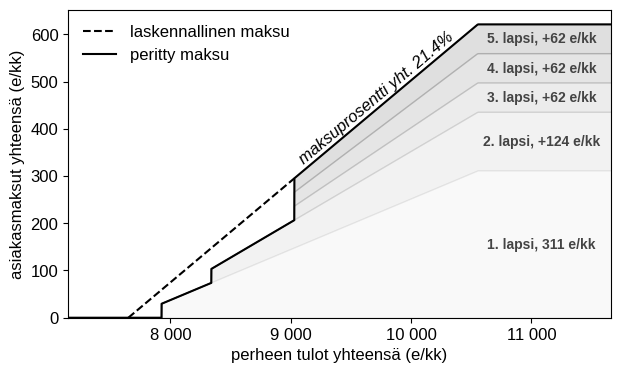

In [2]:
m = local.säännöt.Maksut(5, 2)

fig = plt.figure(figsize=(7, 4))
ax = plt.gca()

#plt.suptitle("Varhaiskasvatuksen asiakasmaksut riippuvat tuloista")
#plt.title(f"porrastus perheelle, jossa on {local.teksti.aikuisia(m.m)} ja {local.teksti.lapsia(m.n)}", size=10)

ax.xaxis.set_major_formatter(local.plot.kformatter)
ax.set_xlabel("perheen tulot yhteensä (e/kk)", size=12)
ax.set_ylabel("asiakasmaksut yhteensä (e/kk)", size=12)

ax.plot(m.x[m.i], m.y[m.i], linestyle="--", label="laskennallinen maksu")
ax.plot(m.x, m.z, label="peritty maksu")
ax.set_xlim(m.x0 - 500, m.x1 + 1100)
ax.set_ylim(0, None)

local.plot.slope_label(ax, m)
local.plot.fan_fill(ax, m, True)

ax.legend(loc="upper left").set_frame_on(False)

plt.savefig(f"asiakasmaksut_{m.n}_{m.m}.png", bbox_inches="tight")

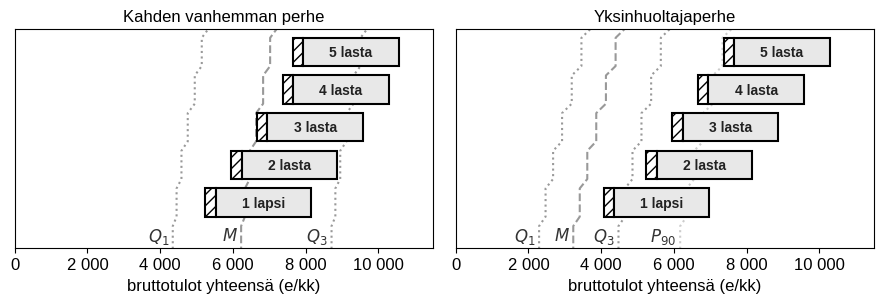

In [3]:
#plt.figure(figsize=(6, 3.2))
#ax = plt.gca()

fig, axs = plt.subplots(1, 2, figsize=(9, 3.2), sharey=True)

#plt.suptitle("Porrastuksen vaikutusväli riippuu perheen koosta", y=0.9)

for m, ax in zip((2, 1), axs):
    ax.set_title("Yksinhuoltajaperhe" if m == 1 else "Kahden vanhemman perhe", size=12)
    ax.xaxis.set_major_formatter(local.plot.kformatter)
    ax.set_xlabel("bruttotulot yhteensä (e/kk)")
    ax.yaxis.set_ticks([])
    
    n = np.arange(1, 6) # Lapsia
    
    h = 0.75
    x0 = local.säännöt.tuloraja(m + n)
    x1 = x0 + local.säännöt.leveys1
    
    ax.barh(n, local.säännöt.leveys1, h, x0, color="white", edgecolor="k", linewidth=1.5, hatch="///")
    ax.barh(n, local.säännöt.leveys2, h, x1, color="#e8e8e8", edgecolor="k", linewidth=1.5)
    
    style = dict(size=10, weight=600, color="#222")
    for i, x in zip(n, x1):
        s = "1 lapsi" if i == 1 else f"{i} lasta"
        ax.text(x + local.säännöt.leveys2 / 2, i, s, **style, va="center", ha="center")
    
    local.plot.backlines(ax, n, m, h, m == 1)
    
    ax.set_xlim(0, 11_500)
    ax.set_ylim(n[0] - 1.6 * h, n[-1] + 0.8 * h)

fig.tight_layout()
plt.savefig(f"tulorajat.png", dpi=150, bbox_inches="tight")

In [4]:
0.2*10.7

2.14